# Exercice: Exploration des données d'une entreprise.

Je vais décomposer mon analyse en 3 parties:

1) L'import et le checking des données ; 
2) L'analyse exploratoire de l'entreprise.


## Part 1: Import et checking des données.

In [2]:
# Import des modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

J'observe qu'il y a des valeurs manquantes dans 'Postal Code'. De plus je dois transformer le dtype de 'Order Date' et 'Ship Date'.

In [7]:
dates_cols = ['Order Date', 'Ship Date'] # Selection des colonnes
df[dates_cols] = df[dates_cols].apply(pd.to_datetime, dayfirst=True) # Changement du dtype des 2 colonnes.

In [8]:
df['Postal Code'].isnull().sum()

11

In [9]:
df['Postal Code'].value_counts()

Postal Code
10035.0    253
10024.0    225
10009.0    220
94122.0    195
10011.0    193
          ... 
32935.0      1
76248.0      1
32127.0      1
32503.0      1
72762.0      1
Name: count, Length: 626, dtype: int64

In [10]:
df['Postal Code'] = df['Postal Code'].fillna(0) # Je remplace les valeurs manquantes par 0.

In [11]:
df['Postal Code'] = df['Postal Code'].astype(int) # D'un point de vue esthétique, j'enlève les décimales dans Postal Code.

In [12]:
df['Sales'].describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

In [13]:
if df.duplicated().sum() > 0:
    print("Il y a des doublons dans le df.")
else:
    print("Il n'y a pas de doublon dans le df.")

Il n'y a pas de doublon dans le df.


## Part 2: L'analyse exploratoire de l'entreprise.

#### Type de clients

In [14]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [15]:
type_clients = df['Segment'].unique() # M'indique la composition de la colonne "Segment" sans doublons.
type_clients

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [17]:
# Je filtre les données pour savoir le nombre pour chaque type de clients.
nbr_clients_grp = df['Segment'].value_counts().reset_index()
nbr_clients_grp.rename(columns={'Segment':'Type de clients', 'count':'Total'}, inplace=True)
nbr_clients_grp

,Type de clients,Total
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


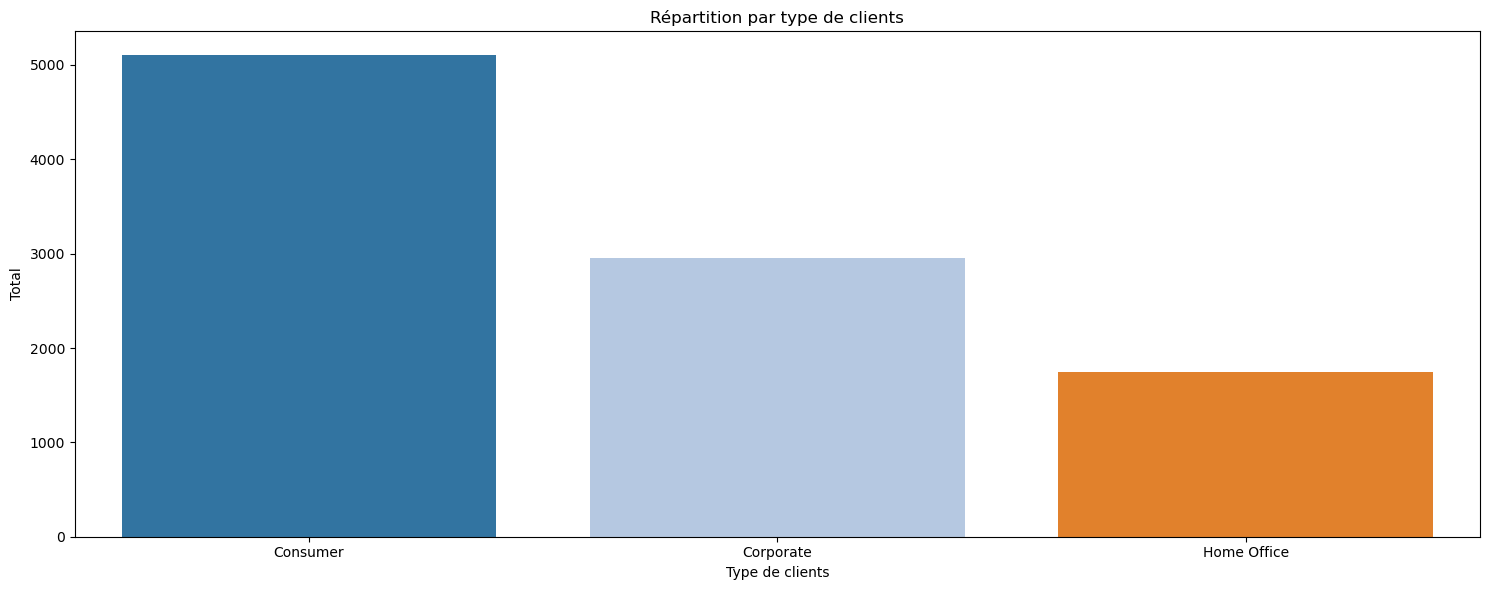

In [18]:
plt.figure(figsize=(15,6))
plt.title('Répartition par type de clients')
sns.barplot(x=nbr_clients_grp['Type de clients'], y=nbr_clients_grp['Total'], hue=nbr_clients_grp['Type de clients'], palette='tab20',legend=False)
plt.ylabel('Total')
plt.tight_layout()
plt.show()

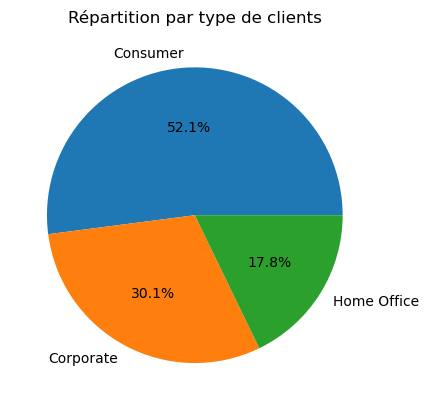

In [19]:
plt.pie(nbr_clients_grp['Total'], labels=nbr_clients_grp['Type de clients'], autopct='%1.1f%%')
plt.title('Répartition par type de clients')
plt.show()

In [20]:
# Je vais groupby la colonne Segment (type de clients) selon les ventes.
ventes_clients = df.groupby('Segment')['Sales'].sum().round(2).reset_index()
ventes_clients = ventes_clients.rename(columns={'Segment':'Type de clients', 'Sales':'Total ventes'})
ventes_clients

,Type de clients,Total ventes
0,Consumer,1148060.53
1,Corporate,688494.07
2,Home Office,424982.18


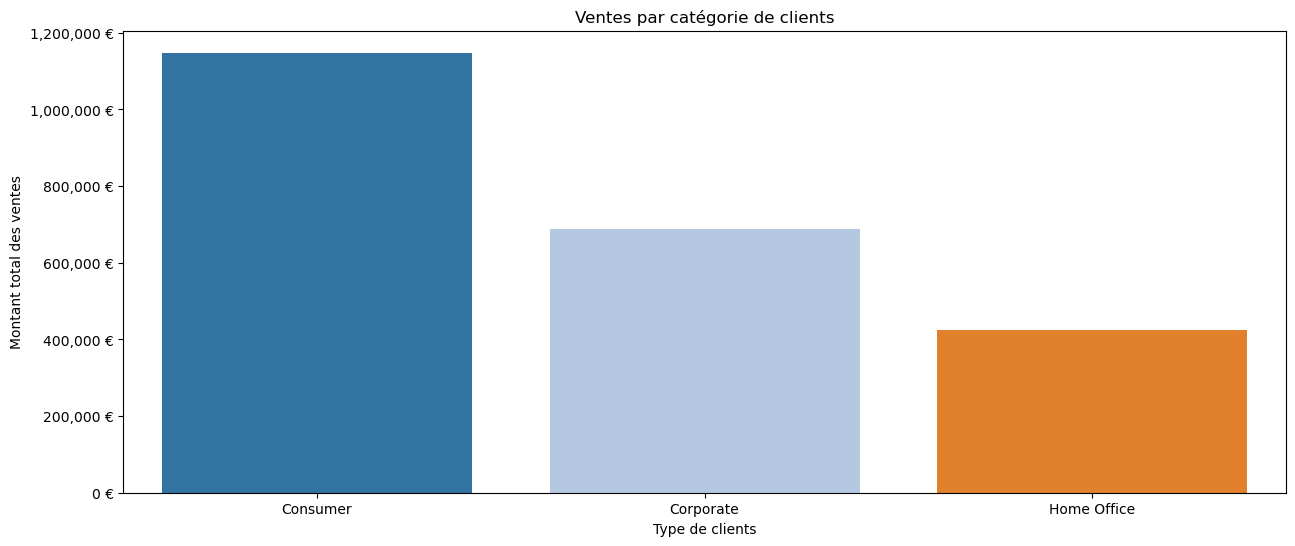

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x='Type de clients', y='Total ventes',hue='Type de clients', data=ventes_clients, palette='tab20')
plt.title('Ventes par catégorie de clients')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))
plt.ylabel('Montant total des ventes')
plt.show()

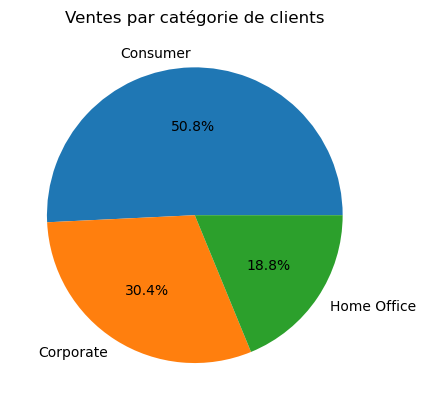

In [24]:
plt.pie(ventes_clients['Total ventes'], labels=ventes_clients['Type de clients'], autopct='%1.1f%%')
plt.title('Ventes par catégorie de clients')
plt.show()

#### Fidélité des clients

In [25]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [27]:
# Je groupby par l'ID du client, son nom, son groupe, selon le nombre de commandes effectués.
freq_comm = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
freq_comm.rename(columns={'Order ID':'Nombre de commandes'}, inplace=True)

freq_comm_fid = freq_comm[freq_comm['Nombre de commandes'] >=2] # Filtrage des clients qui ont commandé au moins 2 fois.
freq_comm_fid_decr = freq_comm_fid.sort_values(by='Nombre de commandes', ascending=False).reset_index(drop=True)

freq_comm_fid_decr.head(12) # Classement des clients les plus fidèles.

,Customer ID,Customer Name,Segment,Nombre de commandes
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,SV-20365,Seth Vernon,Consumer,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,CK-12205,Chloris Kastensmidt,Consumer,32
7,AP-10915,Arthur Prichep,Consumer,31
8,EP-13915,Emily Phan,Consumer,31
9,ZC-21910,Zuschuss Carroll,Consumer,31


#### Classement des meilleurs clients.

In [28]:
# Je groupby par l'ID du client, son nom, son groupe, selon la somme totale des achats.
top_clients = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Sales'].sum().round(2).reset_index()
top_clients.rename(columns={'Sales':'Total des ventes'}, inplace=True)

top_clients_decr = top_clients.sort_values(by='Total des ventes', ascending=False).reset_index(drop=True)
top_clients_decr.head(10)

,Customer ID,Customer Name,Segment,Total des ventes
0,SM-20320,Sean Miller,Home Office,25043.05
1,TC-20980,Tamara Chand,Corporate,19052.22
2,RB-19360,Raymond Buch,Consumer,15117.34
3,TA-21385,Tom Ashbrook,Home Office,14595.62
4,AB-10105,Adrian Barton,Consumer,14473.57
5,KL-16645,Ken Lonsdale,Consumer,14175.23
6,SC-20095,Sanjit Chand,Consumer,14142.33
7,HL-15040,Hunter Lopez,Consumer,12873.30
8,SE-20110,Sanjit Engle,Consumer,12209.44
9,CC-12370,Christopher Conant,Consumer,12129.07


#### Analyse Géographique.

In [29]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [30]:
state = df['State'].value_counts().reset_index() # Nombre de clients par État.
state = state.rename(columns={'count':'Nombre de clients'})
state.head(10) # Affichage des États avec le plus de clients.

,State,Nombre de clients
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [31]:
city = df['City'].value_counts().reset_index() # Nombre de clients par villes.
city = city.rename(columns={'count':'Nombre de clients'})
city.head(10) # Affichage des villes avec le plus de clients.

,City,Nombre de clients
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


#### Classement des États réalisant le plus de bénéfices.

In [35]:
ventes_state = df.groupby('State')['Sales'].sum().round(2).reset_index()
ventes_state.rename(columns={'Sales':'Total des ventes'}, inplace=True)

top_ventes_etat = ventes_state.sort_values(by='Total des ventes', ascending=False).reset_index(drop=True)
top_ventes_etat.head(10)

,State,Total des ventes
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


#### Classement des villes réalisant le plus de bénéfices.

In [36]:
ventes_city = df.groupby('City')['Sales'].sum().round(2).reset_index()
ventes_city.rename(columns={'Sales':'Total des ventes'}, inplace=True)

top_ventes_city = ventes_city.sort_values(by='Total des ventes', ascending=False).reset_index(drop=True)
top_ventes_city.head(10)

,City,Total des ventes
0,New York City,252462.55
1,Los Angeles,173420.18
2,Seattle,116106.32
3,San Francisco,109041.12
4,Philadelphia,108841.75
5,Houston,63956.14
6,Chicago,47820.13
7,San Diego,47521.03
8,Jacksonville,44713.18
9,Detroit,42446.94


#### Bénéfices par États et villes.

In [37]:
state_city_ventes = df.groupby(['State', 'City'])['Sales'].sum().round(2)
state_city_ventes.head(20)

State    City         
Alabama  Auburn            1766.83
         Decatur           3374.82
         Florence          1997.35
         Hoover             525.85
         Huntsville        2484.37
         Mobile            5462.99
         Montgomery        3722.73
         Tuscaloosa         175.70
Arizona  Avondale           946.81
         Bullhead City       22.29
         Chandler          1067.40
         Gilbert           4172.38
         Glendale          2917.86
         Mesa              4037.74
         Peoria            1341.35
         Phoenix          11000.26
         Scottsdale        1466.31
         Sierra Vista        76.07
         Tempe             1070.30
         Tucson            6313.02
Name: Sales, dtype: float64

#### Type de produits

In [38]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [39]:
type_produits = df['Category'].unique()
type_produits

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [40]:
produits = df['Sub-Category'].unique()
produits

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [41]:
nproduits = df['Sub-Category'].nunique()
nproduits

17

In [43]:
produitsby = df.groupby('Category')['Sub-Category'].nunique().reset_index()
produitsby = produitsby.sort_values(by='Sub-Category', ascending=False).reset_index(drop=True)
produitsby

,Category,Sub-Category
0,Office Supplies,9
1,Furniture,4
2,Technology,4


In [44]:
# Classement des meilleurs résultats en ventes par Catégorie et Sous-catégorie.
produitsby_ventes = df.groupby(['Category','Sub-Category'])['Sales'].sum().round(2).reset_index()
produitsby_ventes.rename(columns={'Sales':'Total des ventes'}, inplace=True)

top_produitsby_ventes = produitsby_ventes.sort_values(['Category', 'Total des ventes'], ascending=[True, False]).reset_index(drop=True)
top_produitsby_ventes

,Category,Sub-Category,Total des ventes
0,Furniture,Chairs,322822.73
1,Furniture,Tables,202810.63
2,Furniture,Bookcases,113813.20
3,Furniture,Furnishings,89212.02
4,Office Supplies,Storage,219343.39
5,Office Supplies,Binders,200028.78
6,Office Supplies,Appliances,104618.40
7,Office Supplies,Paper,76828.30
8,Office Supplies,Supplies,46420.31
9,Office Supplies,Art,26705.41


In [48]:
# Classement des meilleurs catégories.
categorie_ventes = df.groupby('Category')['Sales'].sum().round(2).reset_index()
categorie_ventes.rename(columns={'Sales':'Total des ventes'}, inplace=True)

top_categorie_ventes = categorie_ventes.sort_values(by='Total des ventes', ascending=False).reset_index(drop=True)
top_categorie_ventes

,Category,Total des ventes
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


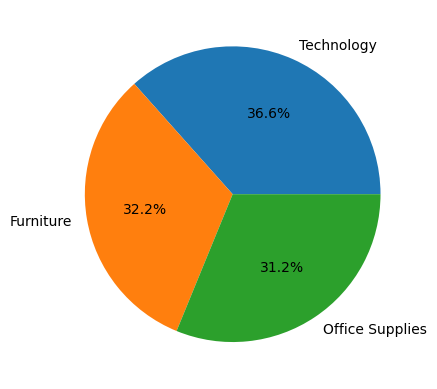

In [50]:
plt.pie(top_categorie_ventes['Total des ventes'], labels=top_categorie_ventes['Category'], autopct='%1.1f%%')
plt.show()

In [51]:
# Classement des meilleurs produits réalisant le plus de bénéfices.
produits_ventes = df.groupby('Sub-Category')['Sales'].sum().round(2).reset_index()
produits_ventes.rename(columns={'Sales':'Total des ventes'}, inplace=True)

top_produits_ventes = produits_ventes.sort_values(by='Total des ventes', ascending=False).reset_index(drop=True)
top_produits_ventes

,Sub-Category,Total des ventes
0,Phones,327782.45
1,Chairs,322822.73
2,Storage,219343.39
3,Tables,202810.63
4,Binders,200028.78
5,Machines,189238.63
6,Accessories,164186.70
7,Copiers,146248.09
8,Bookcases,113813.20
9,Appliances,104618.40


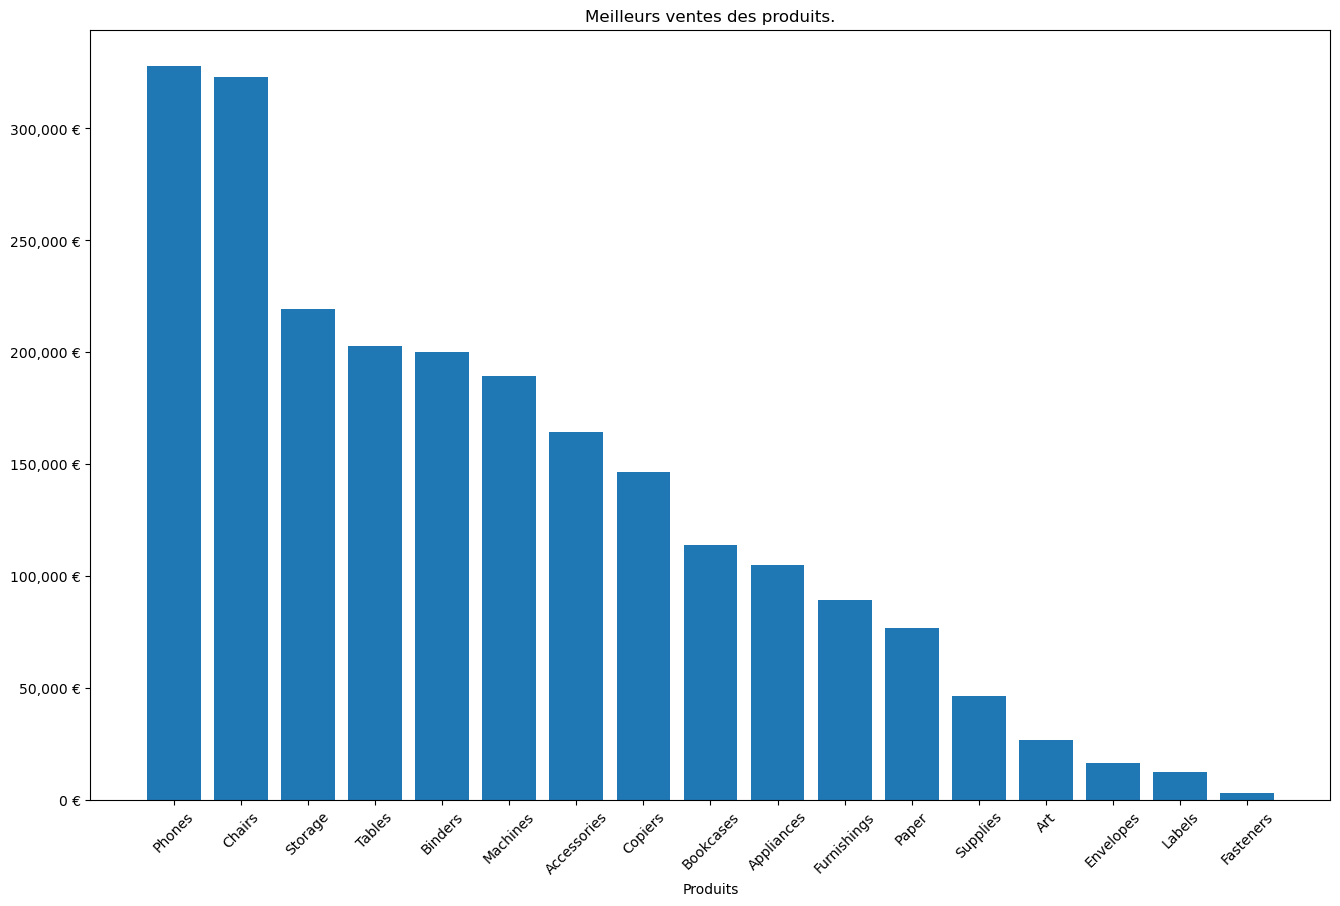

In [52]:
plt.figure(figsize=(16,10))
plt.bar(top_produits_ventes['Sub-Category'],top_produits_ventes['Total des ventes'])
plt.title('Meilleurs ventes des produits.')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))
plt.xlabel('Produits')
plt.xticks(rotation=45)
plt.show()

#### Analyse temporelle (Ans/Trim/Mois).

In [53]:
# Par années
sales_years = df.groupby(df['Order Date'].dt.year)['Sales'].sum().round(2).reset_index()
sales_years.rename(columns={'Sales':'Total ventes annuelles'}, inplace=True)
sales_years

,Order Date,Total ventes annuelles
0,2015,479856.21
1,2016,459436.01
2,2017,600192.55
3,2018,722052.02


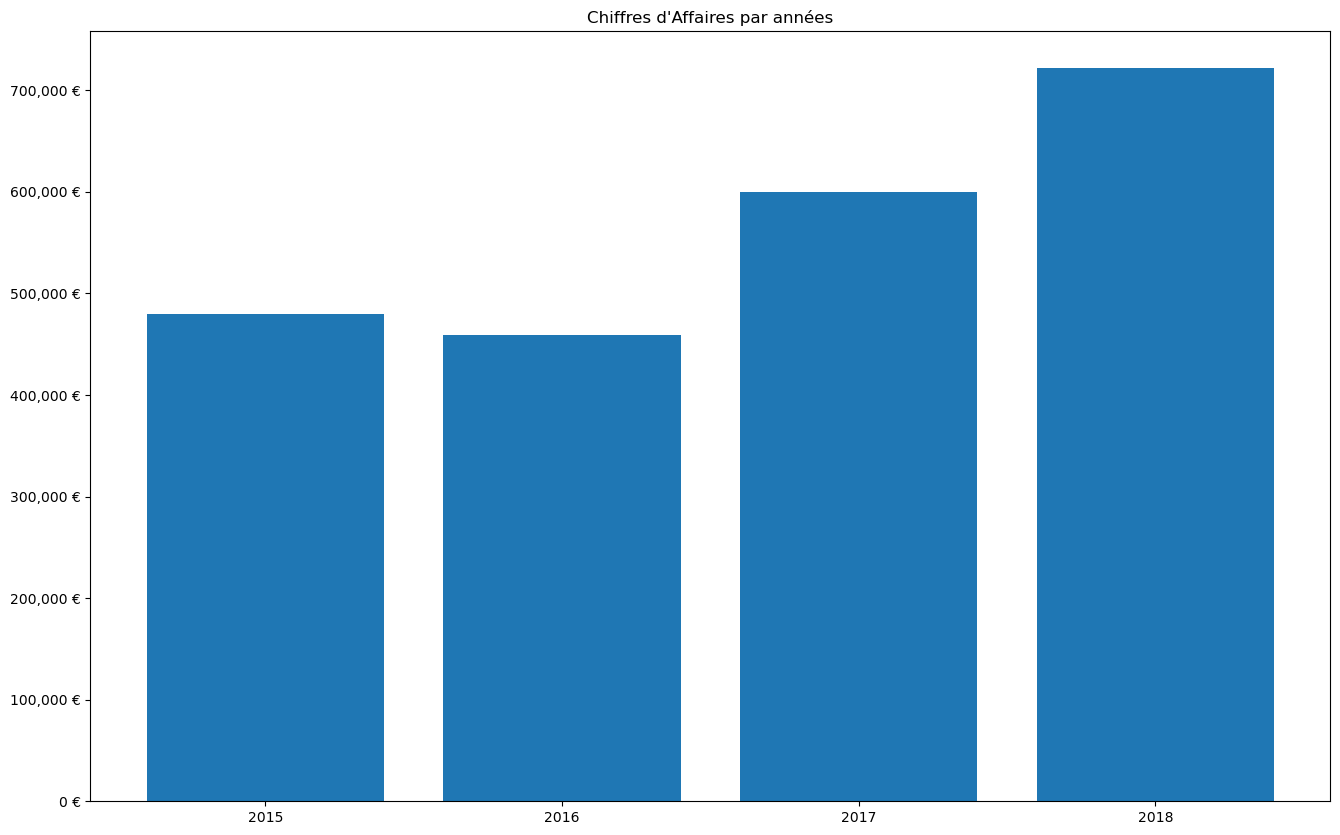

In [54]:
plt.figure(figsize=(16,10))
positions = range(len(sales_years))
plt.bar(positions, sales_years['Total ventes annuelles'])
plt.title("Chiffres d'Affaires par années")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))

plt.xticks(positions, sales_years['Order Date'])

plt.show()

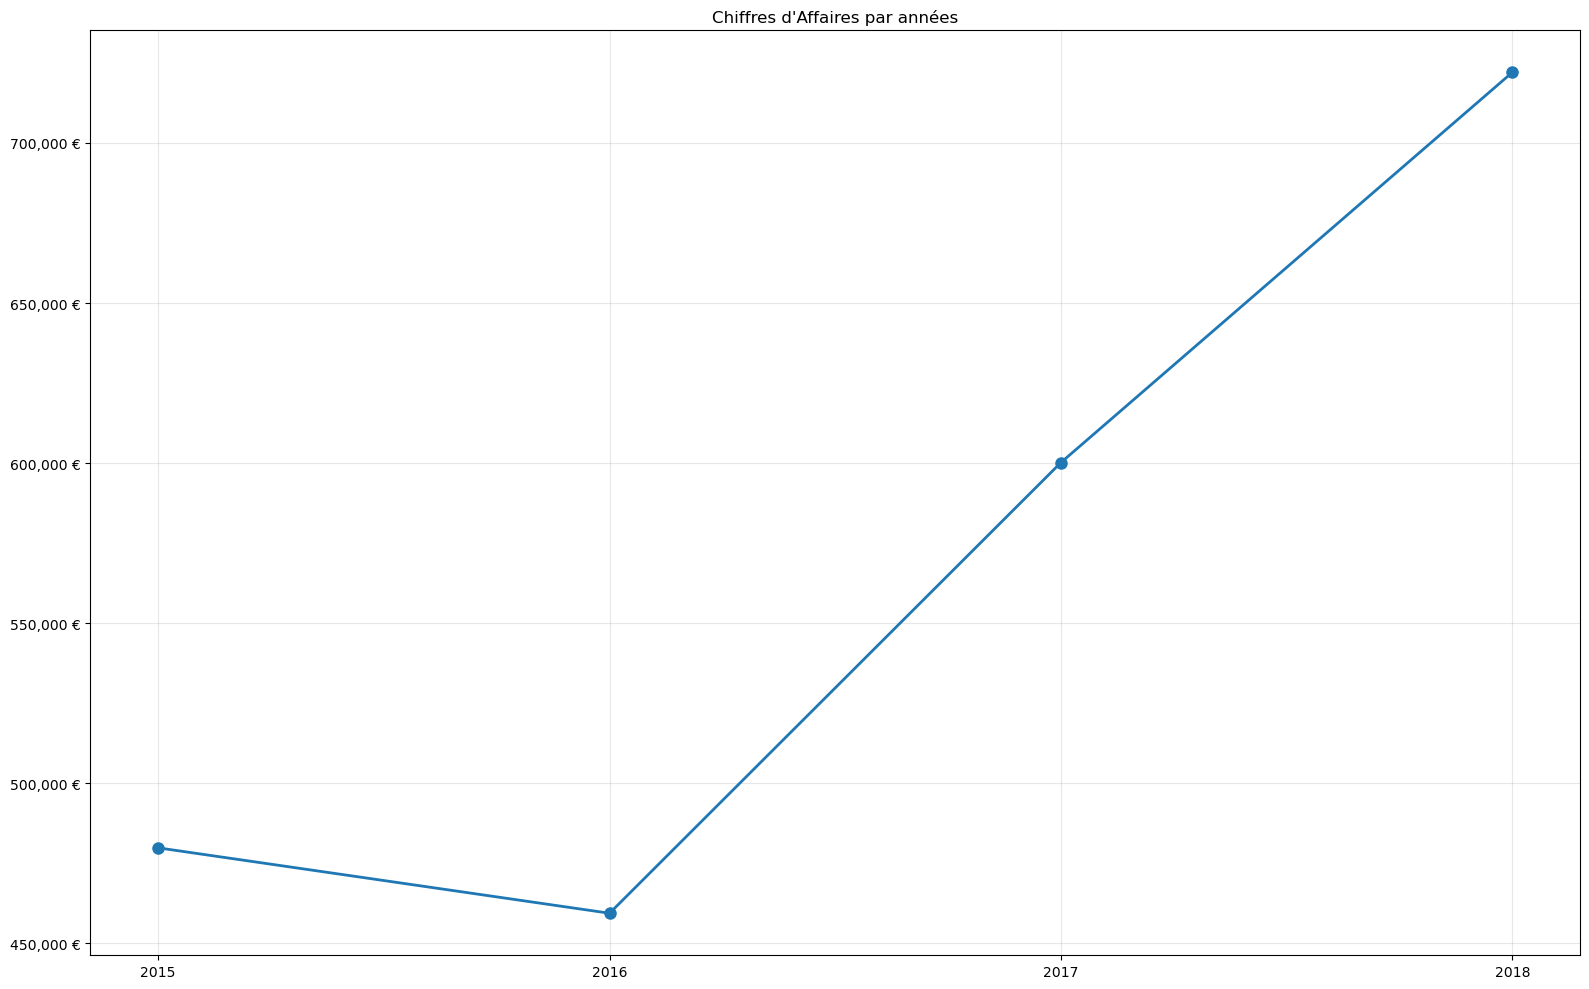

In [55]:
plt.figure(figsize=(16,10))

positions = range(len(sales_years))
plt.plot(positions, sales_years['Total ventes annuelles'], marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title("Chiffres d'Affaires par années")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))
plt.xticks(positions, sales_years['Order Date'])

plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [57]:
# Par trimestres
sales_year2018 = df[df['Order Date'].dt.year == 2018]
sales_quart = sales_year2018.resample('QE', on='Order Date')['Sales'].sum().round(2).reset_index()
sales_quart.rename(columns={'Order Date':'Trimestres', 'Sales':'Total ventes'}, inplace=True)
sales_quart

,Trimestres,Total ventes
0,2018-03-31,122260.88
1,2018-06-30,127558.62
2,2018-09-30,193815.84
3,2018-12-31,278416.68


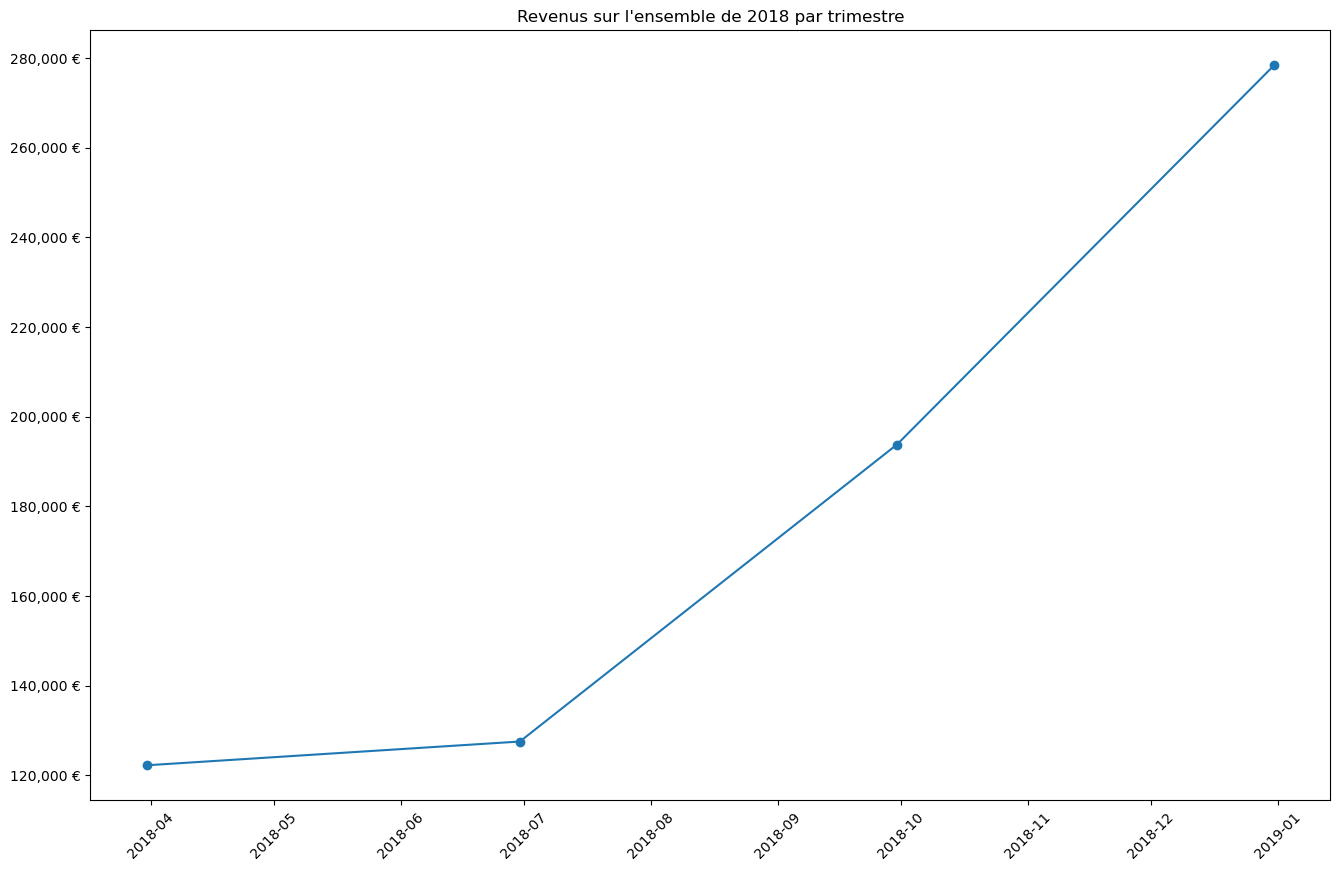

In [58]:
plt.figure(figsize=(16,10))
plt.plot(sales_quart['Trimestres'], sales_quart['Total ventes'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))
plt.title("Revenus sur l'ensemble de 2018 par trimestre")
plt.show()

In [59]:
# Par mois
monthly_sales = sales_year2018.resample('ME', on='Order Date')['Sales'].sum().round(2).reset_index()
monthly_sales.rename(columns={'Order Date':'Mois','Sales':'Total ventes'}, inplace=True)
monthly_sales

,Mois,Total ventes
0,2018-01-31,43476.47
1,2018-02-28,19921.00
2,2018-03-31,58863.41
3,2018-04-30,35541.91
4,2018-05-31,43825.98
5,2018-06-30,48190.73
6,2018-07-31,44825.10
7,2018-08-31,62837.85
8,2018-09-30,86152.89
9,2018-10-31,77448.13


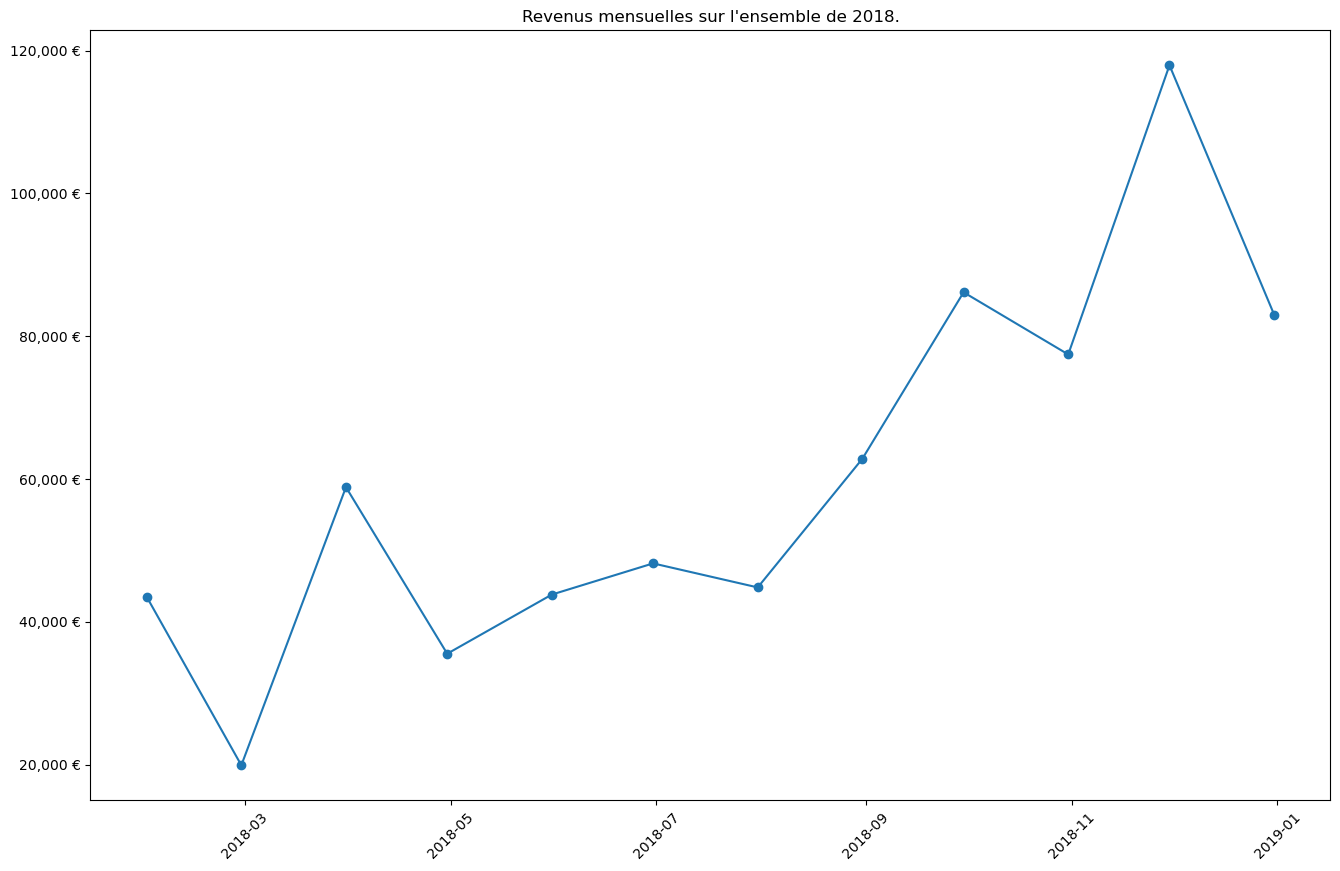

In [60]:
plt.figure(figsize=(16,10))
plt.plot(monthly_sales['Mois'], monthly_sales['Total ventes'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))
plt.title("Revenus mensuelles sur l'ensemble de 2018.")
plt.show()

#### Tendances

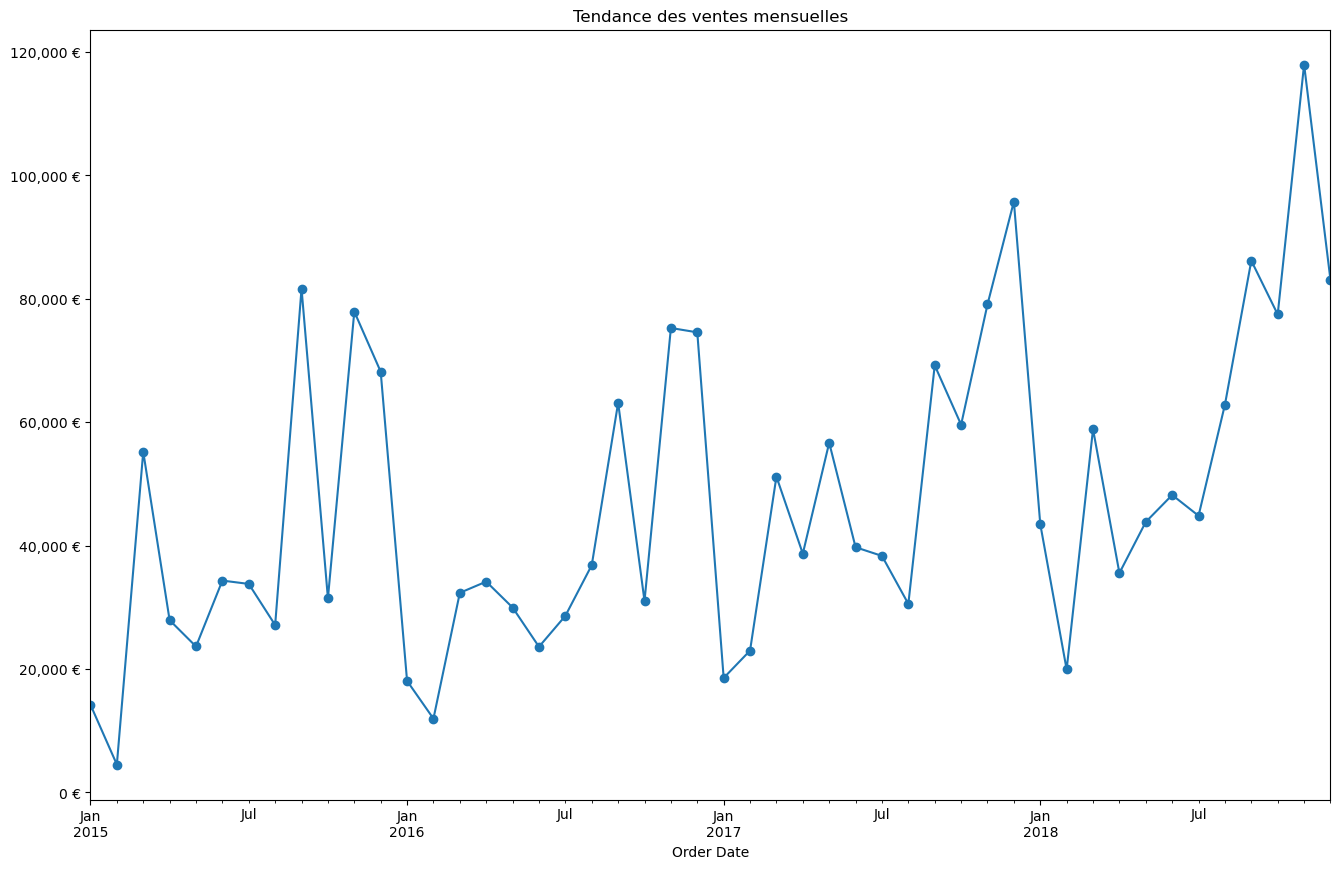

In [62]:
# Par mois
tmonthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
plt.figure(figsize=(16,10))
tmonthly_sales.plot(kind='line', marker='o')
plt.title('Tendance des ventes mensuelles')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))
plt.show()

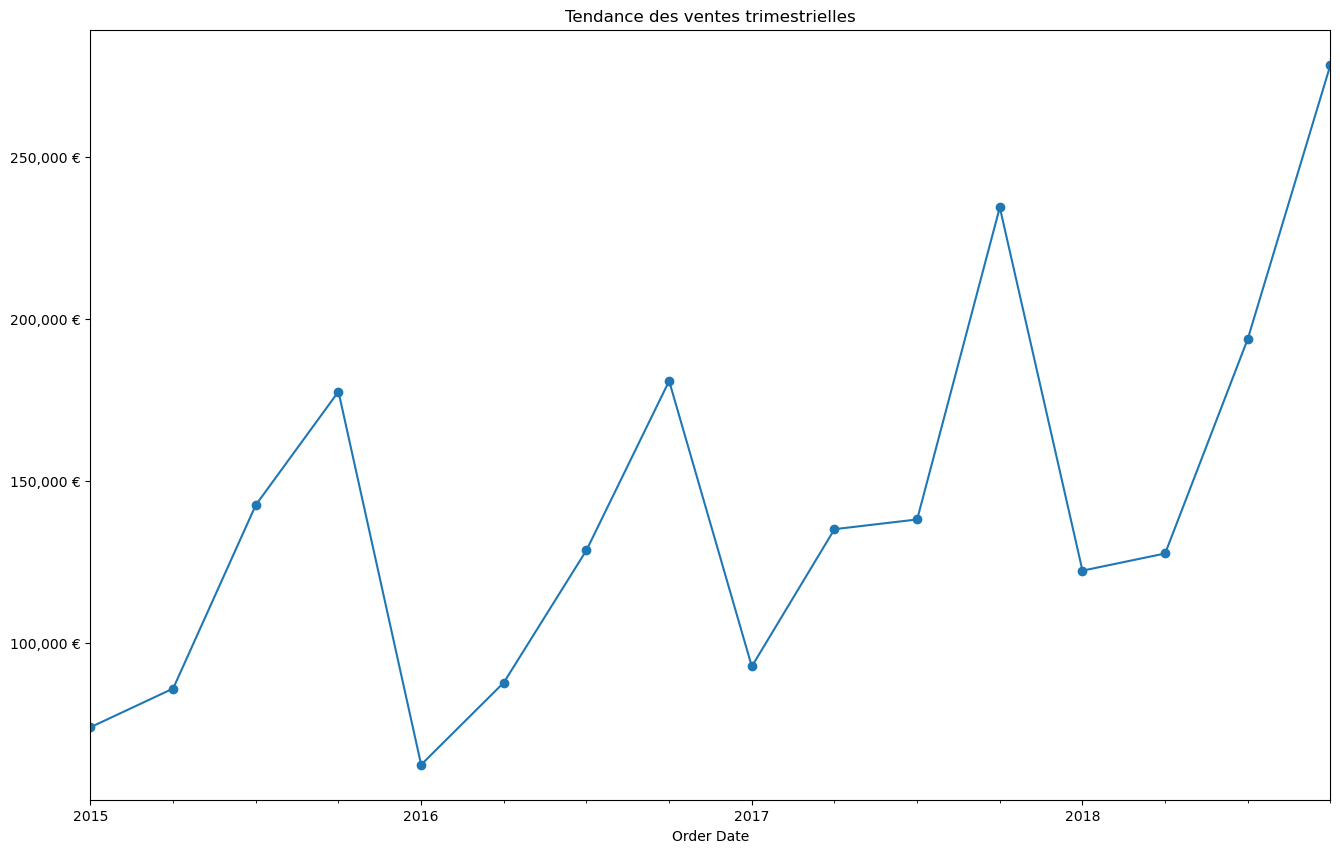

In [63]:
# Par trimestres
tquarterly_sales = df.groupby(df['Order Date'].dt.to_period('Q'))['Sales'].sum()
plt.figure(figsize=(16,10))
tquarterly_sales.plot(kind='line', marker='o')
plt.title('Tendance des ventes trimestrielles')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))
plt.show()

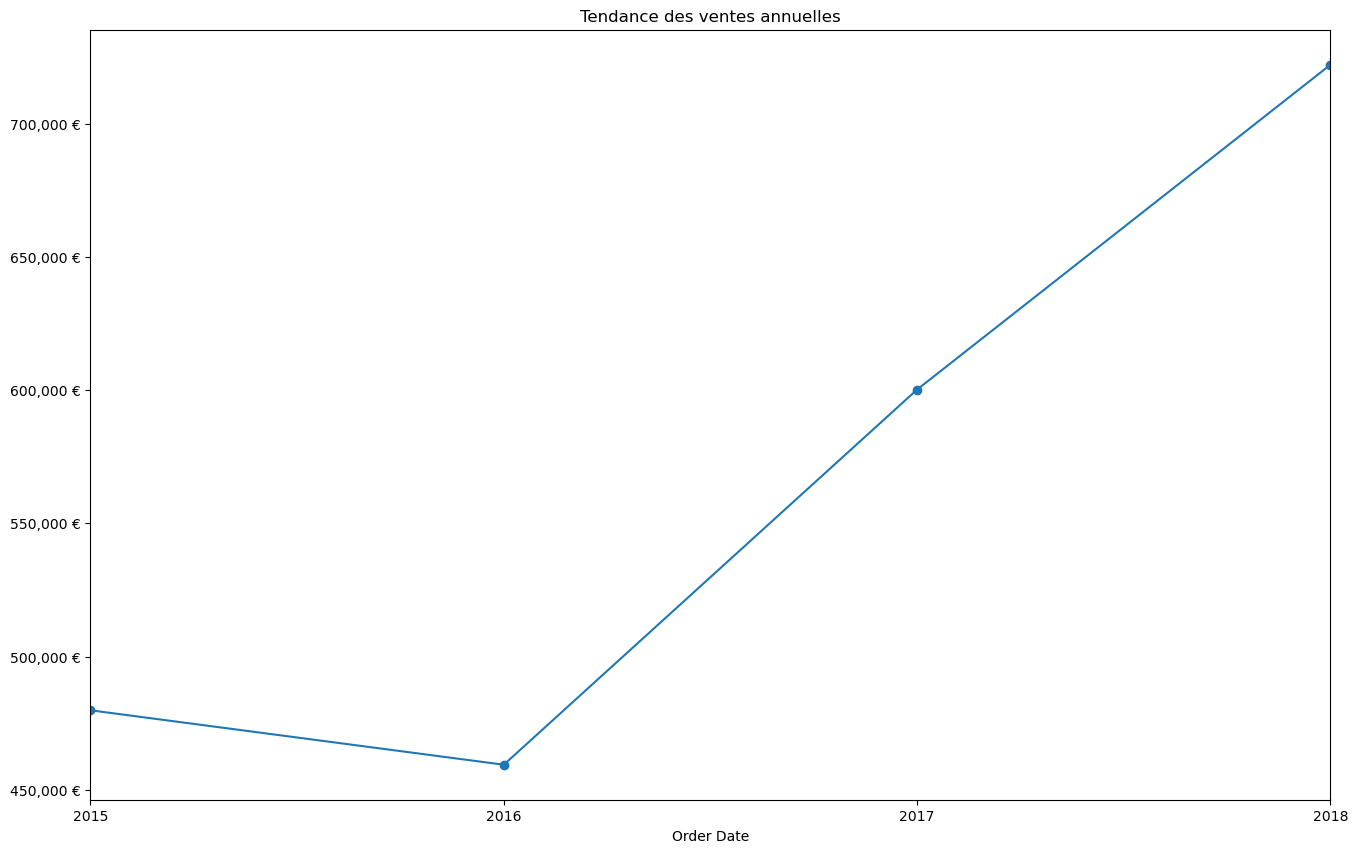

In [64]:
# Par années
tyearly_sales = df.groupby(df['Order Date'].dt.to_period('Y'))['Sales'].sum()
plt.figure(figsize=(16,10))
tyearly_sales.plot(kind='line', marker='o')
plt.title('Tendance des ventes annuelles')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:,.0f} €'))
plt.show()